In [651]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? allows use of basic linear regressio models.
from statsmodels.graphics.api import abline_plot # What does this do? plot for use with a linear regression line.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Metrics for evaluating a model's accuracy.
from sklearn.model_selection import train_test_split #  What does this do? Enables splitting data into train/test sets.
from sklearn import linear_model, preprocessing # What does this do? packages for linear regression and scaling data sets.
import warnings # For handling error messages.


In [652]:
df = pd.read_csv('/Users/markoglodovic/Downloads/electricity_clean.csv')

In [653]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price,S_latitude,S_longitude,D_latitude,D_longitude,x,y,x1,y1
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000,55.001251,-125.002441,64.445961,-149.680909,-1.391521e+07,7.362109e+06,-1.666240e+07,9.463926e+06
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001,55.001251,-125.002441,36.701463,-118.755997,-1.391521e+07,7.362109e+06,-1.321986e+07,4.397576e+06
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001,55.001251,-125.002441,43.979280,-120.737257,-1.391521e+07,7.362109e+06,-1.344041e+07,5.462236e+06
3,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000,55.001251,-125.002441,38.894992,-77.036558,-1.391521e+07,7.362109e+06,-8.575670e+06,4.706641e+06
4,1990-01-01,Exports,Manitoba,Minnesota,5100.424,129051.37,25.299999,55.001251,-97.001038,45.989659,-94.611329,-1.079811e+07,7.362109e+06,-1.053208e+07,5.778692e+06


In [654]:
df = df[['Period', 'Activity', 'Source', 'Destination', 'Energy', 'Total_Value', 'Price']]

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17351 entries, 0 to 17350
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Period       17351 non-null  object 
 1   Activity     17351 non-null  object 
 2   Source       17351 non-null  object 
 3   Destination  17351 non-null  object 
 4   Energy       17351 non-null  float64
 5   Total_Value  17351 non-null  float64
 6   Price        17351 non-null  float64
dtypes: float64(3), object(4)
memory usage: 949.0+ KB


<AxesSubplot:>

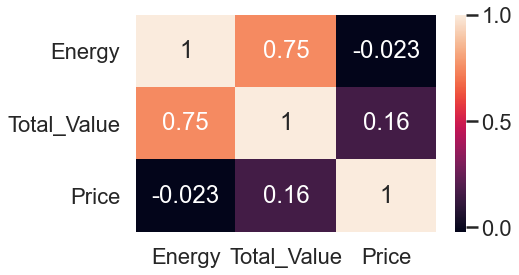

In [656]:
cor = df.corr()
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

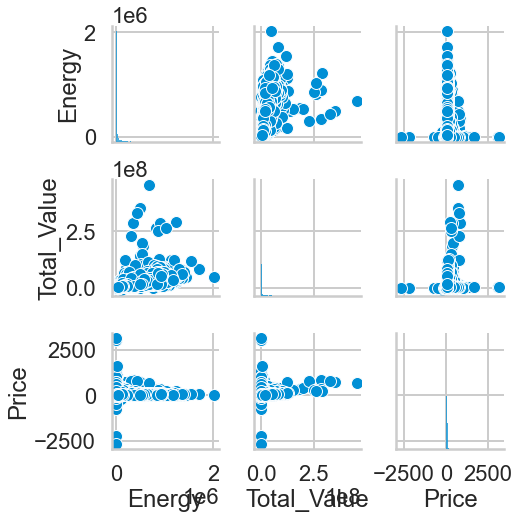

In [657]:
sns.pairplot(df[['Energy', 'Total_Value', 'Price']])

In [658]:
df.shape

(17351, 7)

In [659]:
df['Period']=pd.to_datetime(df['Period'])

In [660]:
df['Source'].unique()


array(['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario',
       'Québec', 'Maine', 'Michigan', 'Minnesota', 'Montana',
       'New England-ISO', 'New York', 'North Dakota', 'Vermont',
       'Washington', 'Saskatchewan', 'Pennsylvania', 'Alberta', 'Idaho',
       'Nebraska', 'South Dakota', 'Texas', 'Oregon', 'Wisconsin', 'Iowa',
       'Missouri', 'Kansas', 'California', 'Minn / N. Dakota',
       'Massachusetts', 'Nova Scotia', 'Illinois', 'Ohio', 'Indiana',
       'New Jersey', 'Arizona', 'Nevada', 'New Mexico', 'Wyoming',
       'Oklahoma', 'Colorado', 'Kentucky', 'Utah', 'Connecticut',
       'Newfoundland and Labrador', 'West Virginia'], dtype=object)

In [661]:
df['Destination'].unique()


array(['Alaska', 'California', 'Oregon', 'Washington', 'Minnesota',
       'North Dakota', 'Maine', 'Massachusetts', 'Michigan', 'New York',
       'Vermont', 'New Brunswick', 'Ontario', 'Manitoba',
       'British Columbia', 'Québec', 'Saskatchewan', 'Alberta', 'Idaho',
       'Nevada', 'Montana', 'New Hampshire', 'New England-ISO',
       'Pennsylvania', 'Arizona', 'Missouri', 'Wisconsin', 'South Dakota',
       'Texas', 'Nebraska', 'Iowa', 'Colorado', 'Kansas', 'Utah',
       'Minn / N. Dakota', 'New Mexico', 'Maryland', 'Nova Scotia',
       'Virginia', 'Wyoming', 'Ohio', 'Tennessee', 'Illinois', 'Indiana',
       'Connecticut', 'Mississippi', 'New Jersey',
       'Newfoundland and Labrador', 'Oklahoma', 'Florida'], dtype=object)

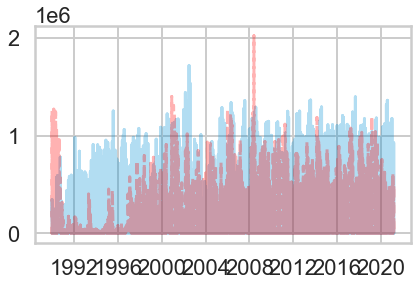

In [662]:
cs = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
cd = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
canada_s = df[df['Source'].isin(cs)]
canada_d = df[df['Destination'].isin(cd)]
plt.plot('Period', 'Energy', data = canada_s,alpha=0.3)
plt.plot('Period', 'Energy', data = canada_d, color='red', linestyle = 'dashed',alpha=0.3)
plt.show()


In [663]:
canada_s1 = canada_s[canada_s['Period'] > '1997-01-01']

In [664]:
canada_d1 = canada_d[canada_d['Period'] > '1997-01-01']

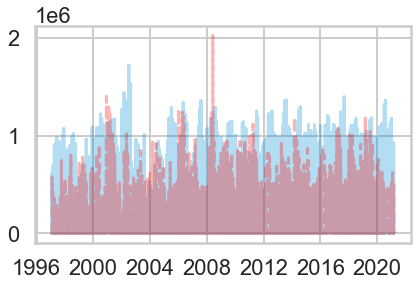

In [665]:
plt.plot('Period', 'Energy', data = canada_s1,alpha=0.3)
plt.plot('Period', 'Energy', data = canada_d1, color='red', linestyle = 'dashed',alpha=0.3)
plt.show()



In [666]:
canada_d1 =  canada_d1.set_index('Period')

In [667]:
canada_s1 =  canada_s1.set_index('Period')

In [668]:

canada_d1.head()

,Activity,Source,Destination,Energy,Total_Value,Price
Period,,,,,,
1997-02-01,Imports,Maine,New Brunswick,730.0,37861.00,51.860001
1997-02-01,Imports,Michigan,Ontario,1417.0,8420.62,5.940000
1997-02-01,Imports,Montana,Alberta,282.0,15485.56,54.910000
1997-02-01,Imports,Montana,British Columbia,12.0,857.37,71.449997
1997-02-01,Imports,New York,Ontario,8066.0,318323.30,39.459999


In [669]:
canada_s1.head()

,Activity,Source,Destination,Energy,Total_Value,Price
Period,,,,,,
1997-02-01,Exports,British Columbia,Alaska,88.8,3477.00,39.160000
1997-02-01,Exports,British Columbia,Idaho,465.0,9852.47,21.190001
1997-02-01,Exports,British Columbia,Montana,505.0,11007.16,21.799999
1997-02-01,Exports,British Columbia,Oregon,3780.0,67276.21,17.799999
1997-02-01,Exports,British Columbia,Washington,225174.0,2837726.37,12.600000


In [670]:
canada_d1.shape

(6412, 6)

In [671]:
canada_d1 = canada_d1.resample('M').sum()

In [672]:
canada_d1.shape

(290, 3)

In [673]:
canada_d1 = canada_d1.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
canada_d1.head()

,EnergyD,Total_ValueD,PriceD
Period,,,
1997-02-28,653599.00,13130239.87,316.939995
1997-03-31,479291.90,10259813.74,348.859998
1997-04-30,434195.24,9055953.90,218.430002
1997-05-31,436407.76,9649268.92,243.650003
1997-06-30,451981.10,11113504.12,341.960004


In [674]:
canada_s1 = canada_s1.resample('M').sum()

In [675]:
canada_s1 = canada_s1.rename(columns={'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})
canada_s1.head()

,EnergyS,Total_ValueS,PriceS
Period,,,
1997-02-28,2767060.471,9.093267e+07,626.330000
1997-03-31,3100076.948,9.540401e+07,638.880000
1997-04-30,3466407.860,1.001265e+08,647.580000
1997-05-31,2871591.900,8.833757e+07,679.989997
1997-06-30,3607702.042,1.154696e+08,834.889989


In [676]:
canada_net = pd.concat([canada_s1,canada_d1], axis =1)
canada_net['Net'] = canada_s1 ['EnergyS'] - canada_d1['EnergyD']

In [677]:
canada_net.head(50)

,EnergyS,Total_ValueS,PriceS,EnergyD,Total_ValueD,PriceD,Net
Period,,,,,,,
1997-02-28,2767060.471,9.093267e+07,626.330000,653599.000,1.313024e+07,316.939995,2113461.471
1997-03-31,3100076.948,9.540401e+07,638.880000,479291.900,1.025981e+07,348.859998,2620785.048
1997-04-30,3466407.860,1.001265e+08,647.580000,434195.240,9.055954e+06,218.430002,3032212.620
1997-05-31,2871591.900,8.833757e+07,679.989997,436407.760,9.649269e+06,243.650003,2435184.140
1997-06-30,3607702.042,1.154696e+08,834.889989,451981.100,1.111350e+07,341.960004,3155720.942
1997-07-31,4641048.503,1.397164e+08,827.759993,401502.060,1.286503e+07,377.870000,4239546.443
1997-08-31,4520765.166,1.401299e+08,972.370004,318015.500,1.004713e+07,356.849999,4202749.666
1997-09-30,3775462.043,1.184004e+08,847.299994,649228.940,1.794006e+07,287.830000,3126233.103
1997-10-31,3783099.364,1.277915e+08,749.719997,1436076.500,4.667054e+07,393.220002,2347022.864


In [678]:
canada_net.tail()

,EnergyS,Total_ValueS,PriceS,EnergyD,Total_ValueD,PriceD,Net
Period,,,,,,,
2020-11-30,4.635140e+06,1.932602e+08,1504.859639,7.602012e+05,2.355559e+07,446.850001,3.874939e+06
2020-12-31,5.913575e+06,2.538901e+08,1529.639733,7.161897e+05,2.465859e+07,575.550003,5.197385e+06
2021-01-31,5.404670e+06,2.316963e+08,1199.258489,8.705540e+05,3.101944e+07,1136.529980,4.534116e+06
2021-02-28,4.529814e+06,3.212798e+08,5904.674340,1.166240e+06,8.057252e+07,1636.080006,3.363574e+06
2021-03-31,4.767327e+06,1.922936e+08,1386.798071,8.791408e+05,3.114971e+07,682.250001,3.888186e+06


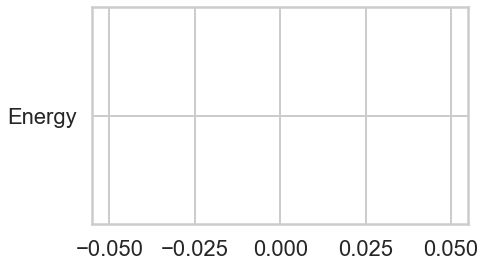

In [679]:
plt.plot('Energy', data = canada_net,alpha=0.5)

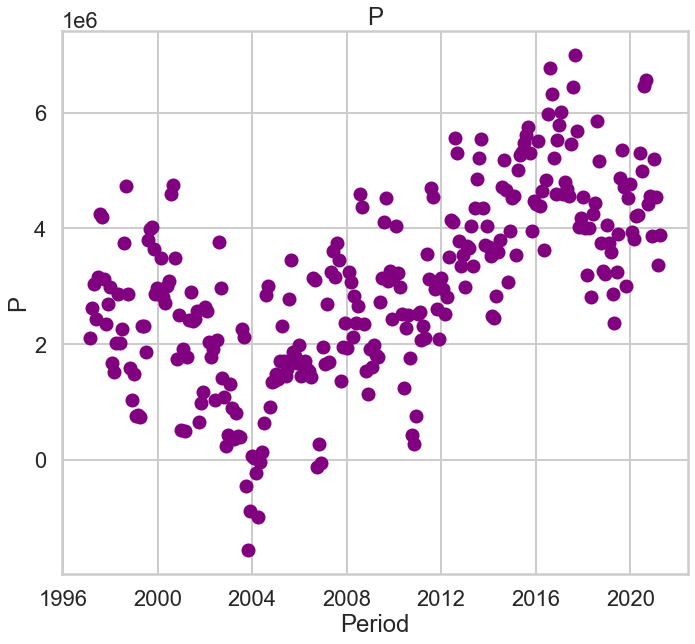

In [680]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(canada_net.index.values,
           canada_net['Net'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Period",
       ylabel="P",
       title="P")

plt.show()

In [681]:
from scipy.stats import ks_2samp
from numpy.random import lognormal
data2 = lognormal(3, 1, 100)

t = ks_2samp(canada_net['Net'], data2 )

In [682]:
print(t)

KstestResult(statistic=0.9724137931034482, pvalue=8.881784197001252e-16)


In [683]:
canada_net.reset_index(level=0, inplace=True)

In [684]:
dfc = canada_net[['Period', 'Net']]
dfc.set_index('Period',  inplace=True)
dfc.head()

,Net
Period,
1997-02-28,2113461.471
1997-03-31,2620785.048
1997-04-30,3032212.620
1997-05-31,2435184.140
1997-06-30,3155720.942


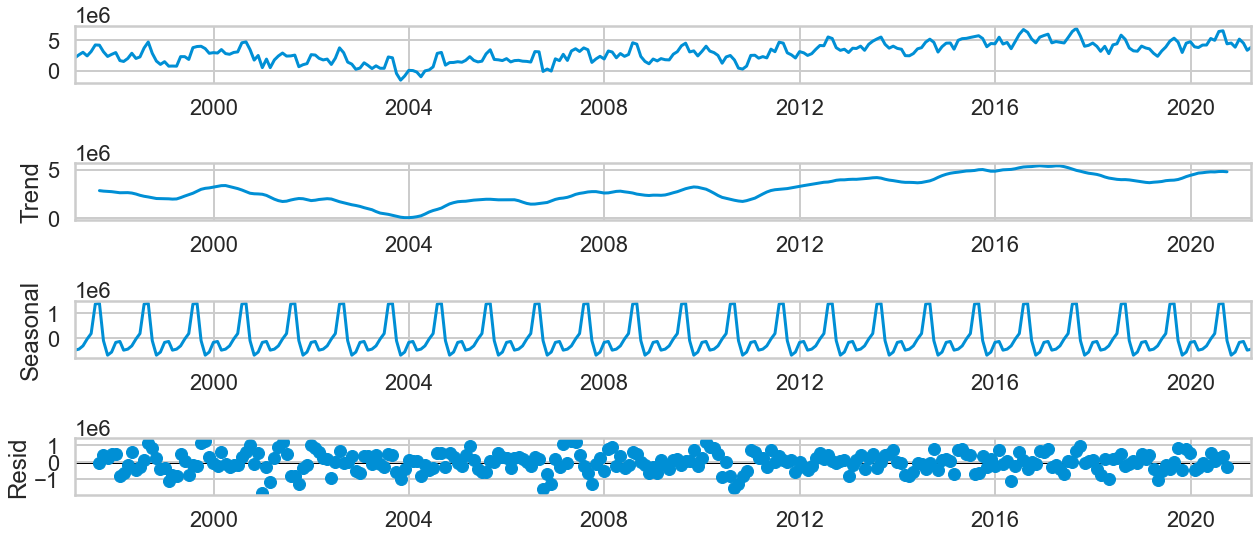

In [685]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dfc, model='additive')
fig = decomposition.plot()
plt.show()

In [686]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [687]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [688]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfc,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9515.45541362989
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8976.87821400471
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8553.750399166387
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8133.361752605564
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8582.509488454156
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8499.619089291753
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8168.309574458554
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8133.9458171763
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9289.871189369962
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8860.371467961939
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8417.880275229601
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8005.296031214155
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8888.62188525925
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8821.408881808049
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8071.132589305969
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8005.87647111182
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8712.383704655193
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8318.49234813693
ARIMA(0, 1, 0)x(0

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 7839.1691871860885. Therefore we should consider this to be optimal option.


Fitting the ARIMA model

In [689]:
mod = sm.tsa.statespace.SARIMAX(dfc,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3491      0.111     -3.142      0.002      -0.567      -0.131
ar.S.L12      -0.2131      0.132     -1.617      0.106      -0.471       0.045
ma.S.L12      -0.6739      0.089     -7.612      0.000      -0.847      -0.500
sigma2      7.848e+11   3.92e-14      2e+25      0.000    7.85e+11    7.85e+11


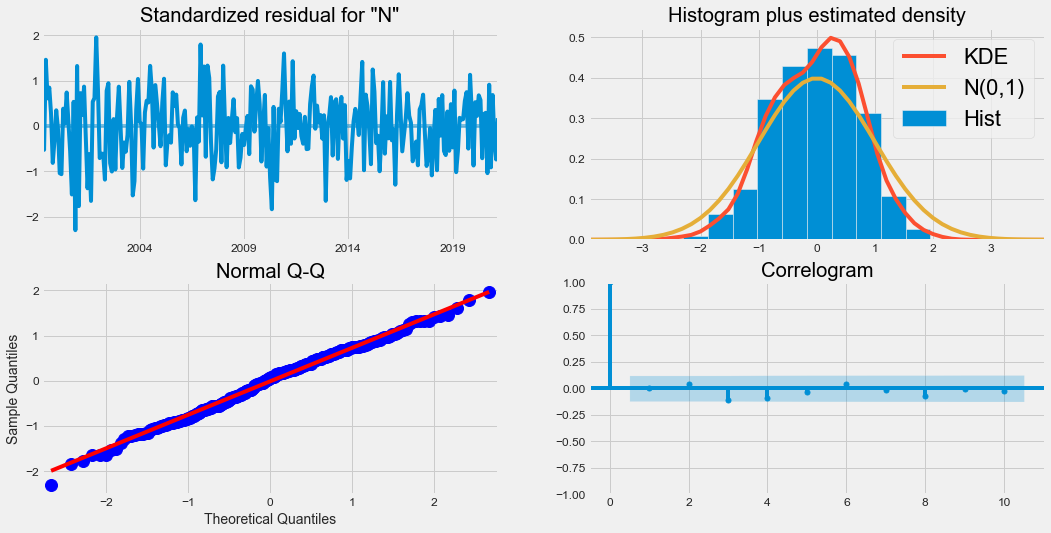

In [690]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

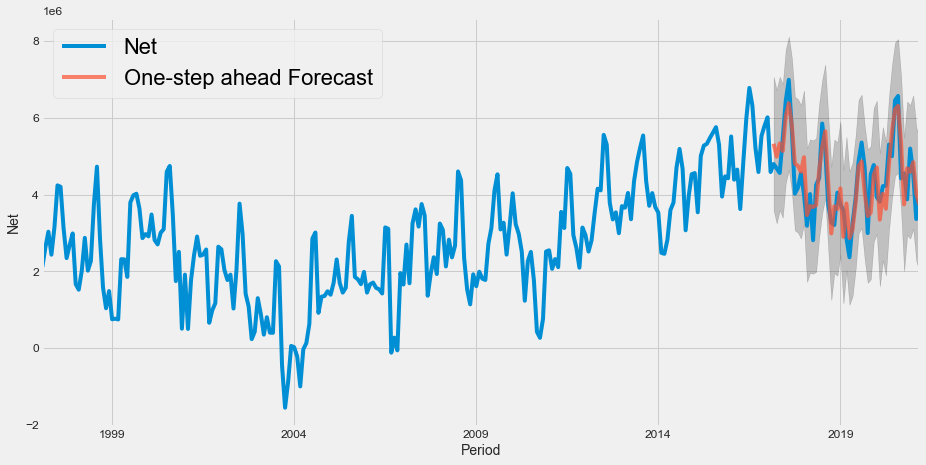

In [691]:
pred = results.get_prediction(start=pd.to_datetime('2017-03-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfc['1992':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Period')
ax.set_ylabel('Net')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. 
Overall, our forecasts align with the true values very well

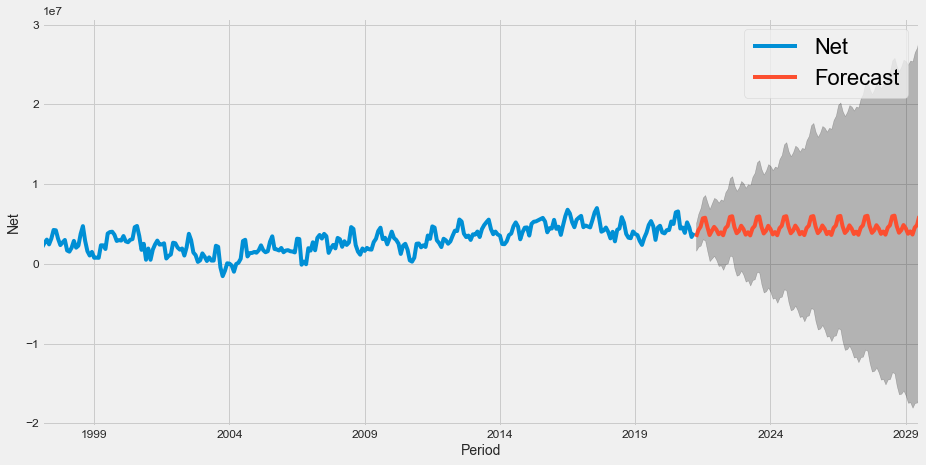

In [692]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = dfc.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Period')
ax.set_ylabel('Net')
plt.legend()
plt.show()

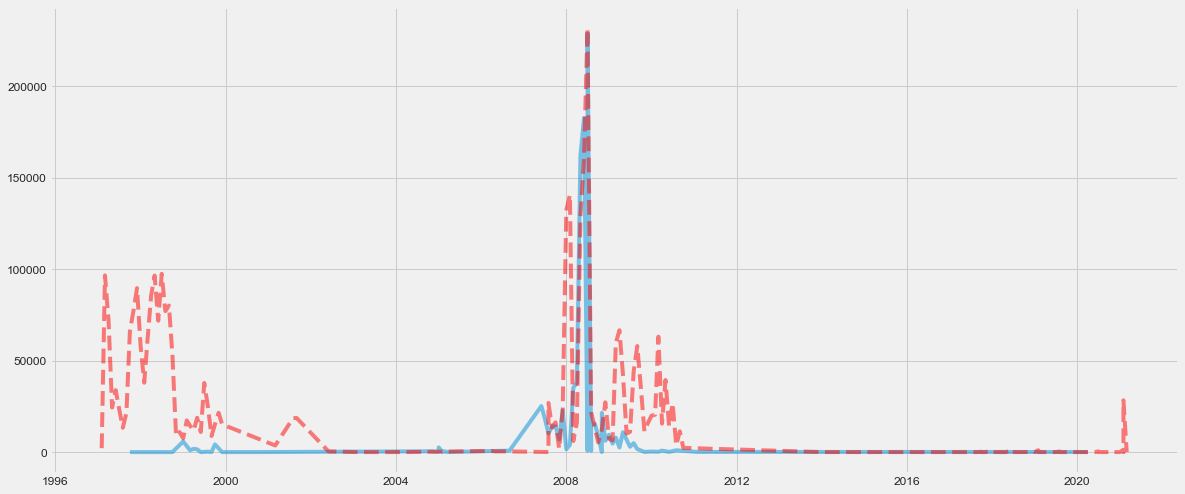

In [693]:
ss = ['Texas','West Virginia','Oklahoma','Kentucky']
sd = ['Texas','West Virginia','Oklahoma','Kentucky','Maryland','Virginia','Tennessee','Florida']
south_s = df[df['Source'].isin(ss)]
south_d = df[df['Destination'].isin(sd)]
plt.plot('Period', 'Energy', data = south_s, alpha=0.5)
plt.plot('Period', 'Energy', data = south_d, color='red', linestyle = 'dashed',alpha=0.5)
plt.show()


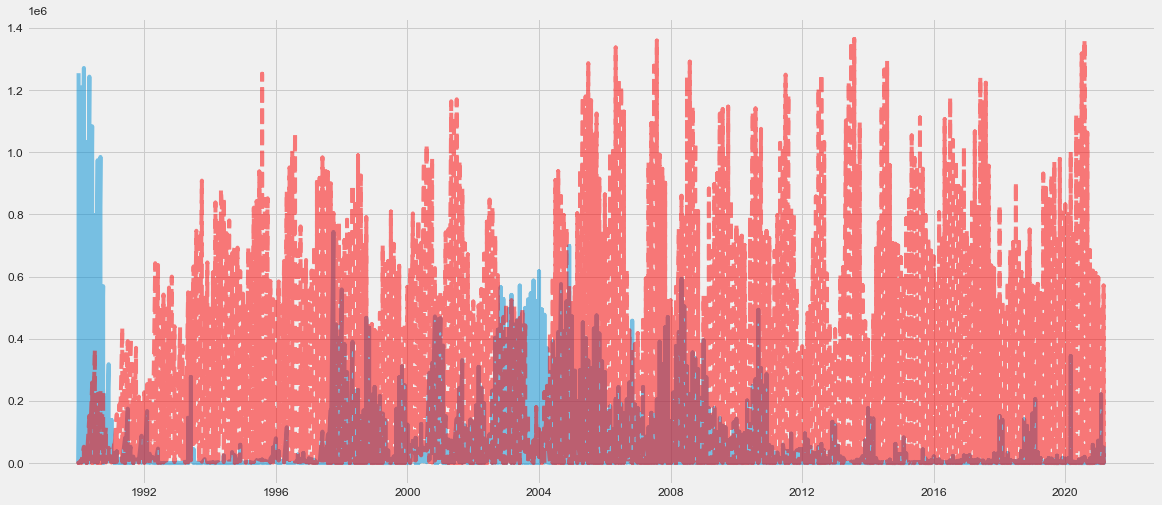

In [694]:
ms= ['Michigan', 'Minnesota','North Dakota','Nebraska', 'South Dakota','Wisconsin', 'Iowa','Missouri','Kansas','Minn / N. Dakota','Illinois', 'Ohio', 'Indiana']
md = ['Michigan', 'Minnesota','North Dakota','Nebraska', 'South Dakota','Wisconsin', 'Iowa','Missouri','Kansas','Minn / N. Dakota','Illinois', 'Ohio', 'Indiana']
middle_s = df[df['Source'].isin(ms)]
middle_d = df[df['Destination'].isin(md)]
plt.plot('Period', 'Energy', data = middle_s ,alpha=0.5)
plt.plot('Period', 'Energy', data = middle_d, color='red', linestyle = 'dashed',alpha=0.5)
plt.show()


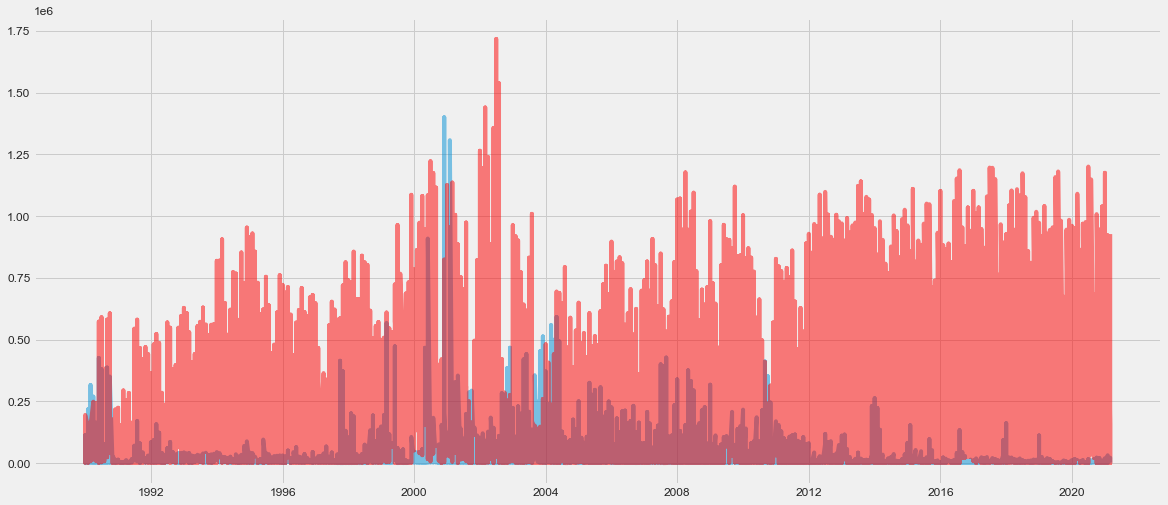

In [695]:
nes = ['Maine','New England-ISO','New York','Vermont','Pennsylvania','Massachusetts','New Jersey','Connecticut']
ned = ['Maine','New England-ISO','New York','Vermont','Pennsylvania','Massachusetts','New Jersey','Connecticut']
east_s= df[df['Source'].isin(nes)]
east_d= df[df['Destination'].isin(ned)]
plt.plot('Period', 'Energy', data = east_s,alpha=0.5)
plt.plot('Period', 'Energy', data = east_d, color='red',  alpha=0.5)
plt.show()

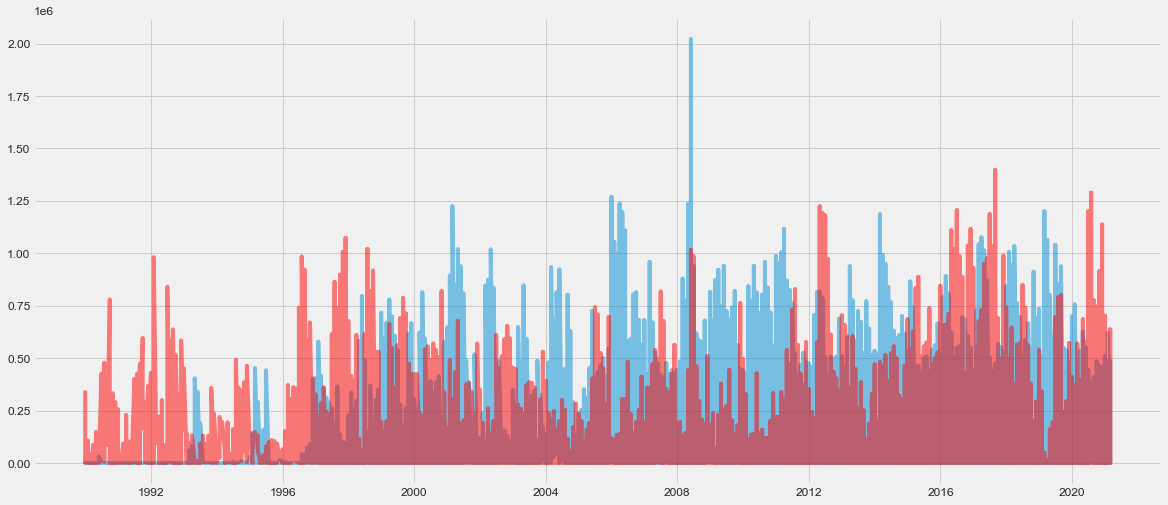

In [696]:
ws = ['Montana','Washington','Idaho','Oregon','California','Arizona','Nevada', 'New Mexico','Colorado', 'Utah','Wyoming']
wd = ['Montana','Washington','Idaho','Oregon','California','Arizona','Nevada', 'New Mexico','Colorado', 'Utah','Wyoming']
west_s = df[df['Source'].isin(ws)]
west_d = df[df['Destination'].isin(wd)]
plt.plot('Period', 'Energy', data = west_s,alpha=0.5)
plt.plot('Period', 'Energy', data = west_d, color='red', alpha = 0.5)
plt.show()

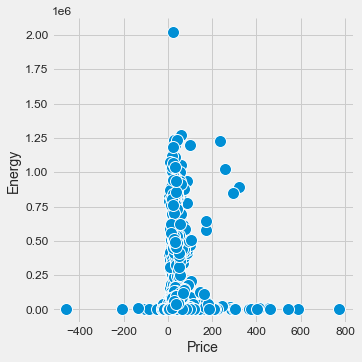

In [697]:
sns.relplot(x='Price', y='Energy', data = west_s)

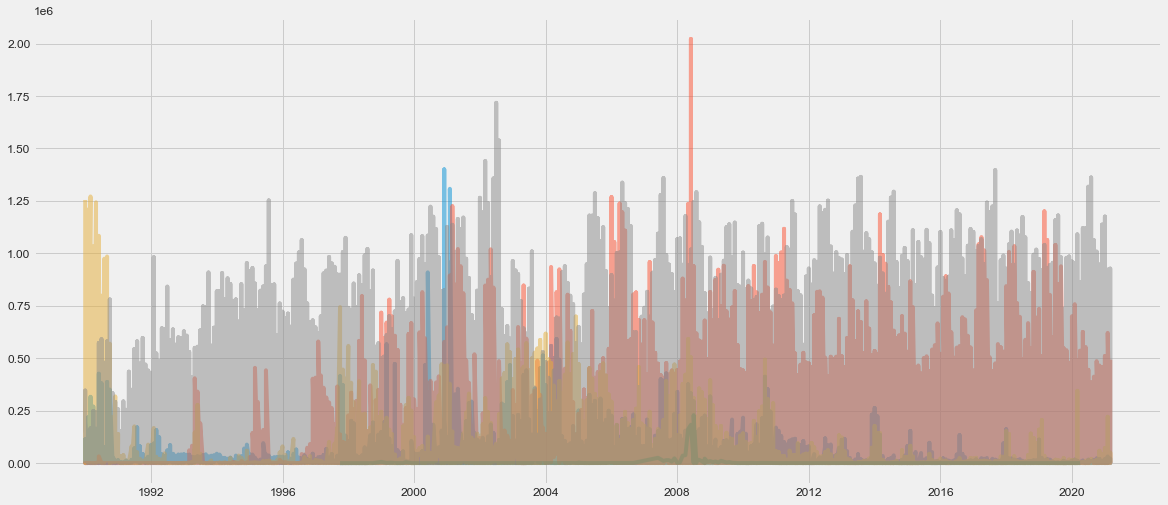

In [698]:
plt.plot('Period', 'Energy', data = east_s,alpha =0.5)
plt.plot('Period', 'Energy', data = west_s,alpha =0.5)
plt.plot('Period', 'Energy', data = middle_s,alpha =0.5)
plt.plot('Period', 'Energy', data = south_s,alpha =0.5)
plt.plot('Period', 'Energy', data = canada_s,alpha =0.5)

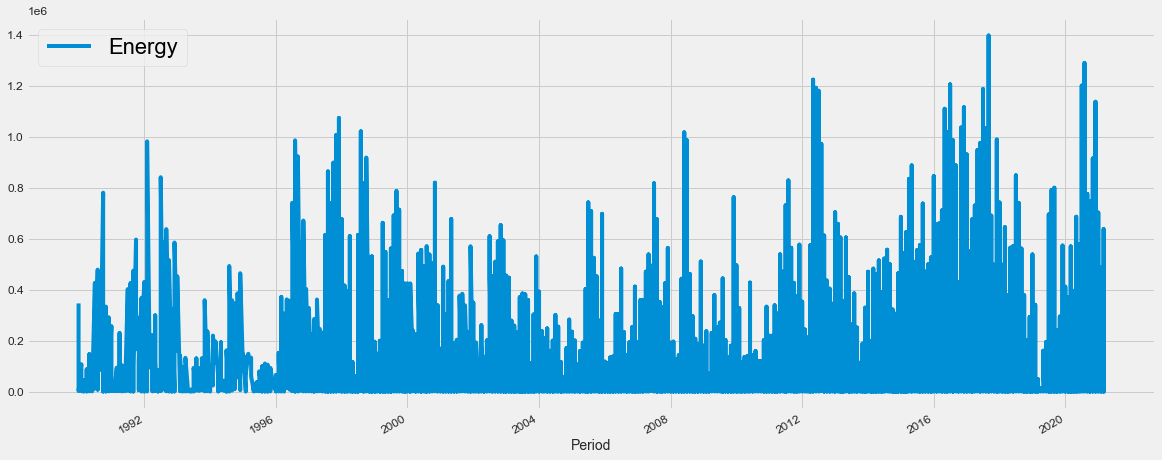

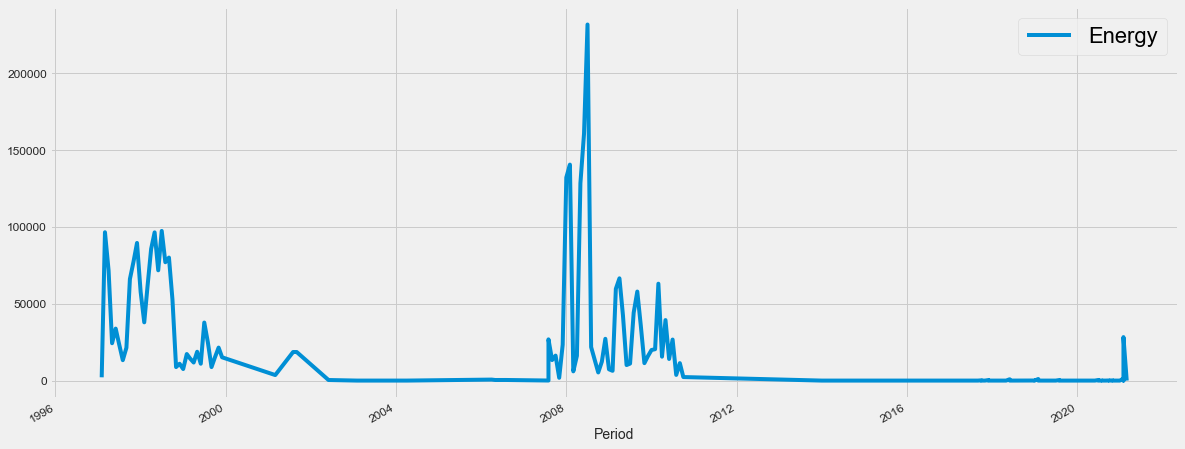

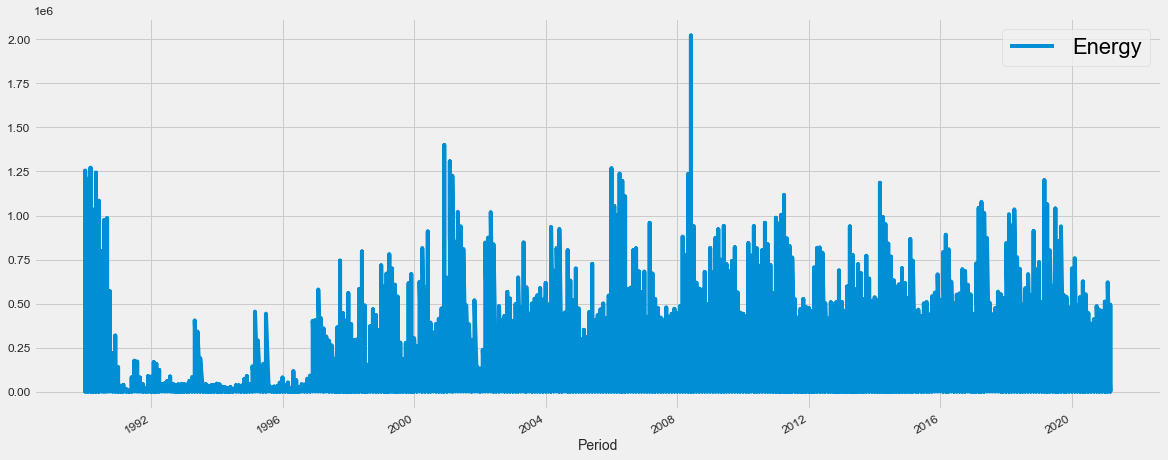

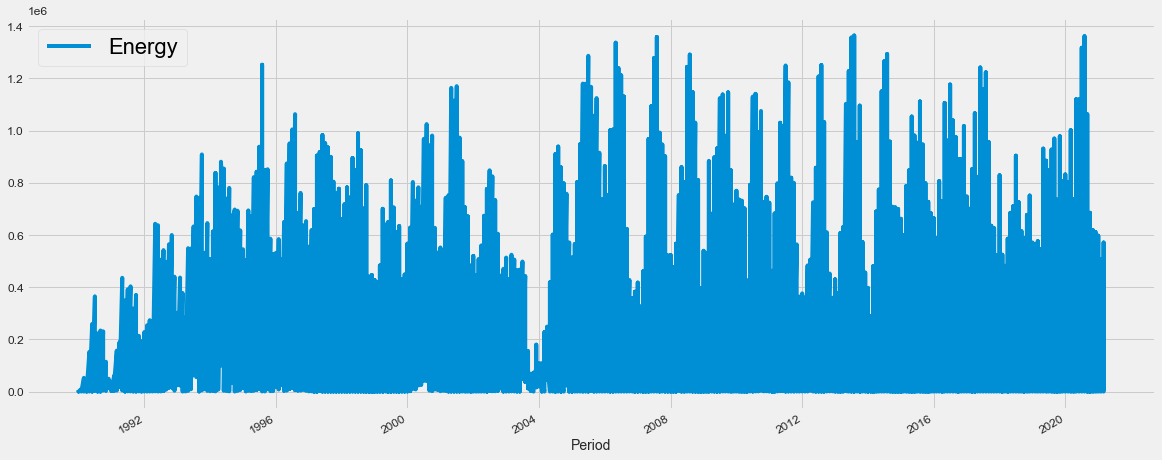

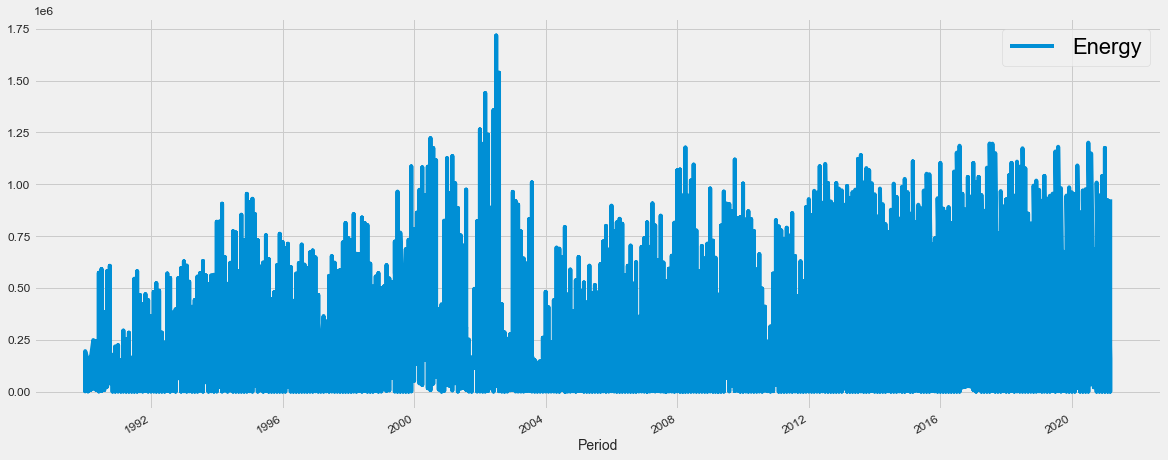

In [699]:
west_d.plot( 'Period', 'Energy')
south_d.plot('Period', 'Energy')
canada_d.plot('Period', 'Energy')
middle_d.plot('Period', 'Energy')
east_d.plot('Period', 'Energy')
plt.show()

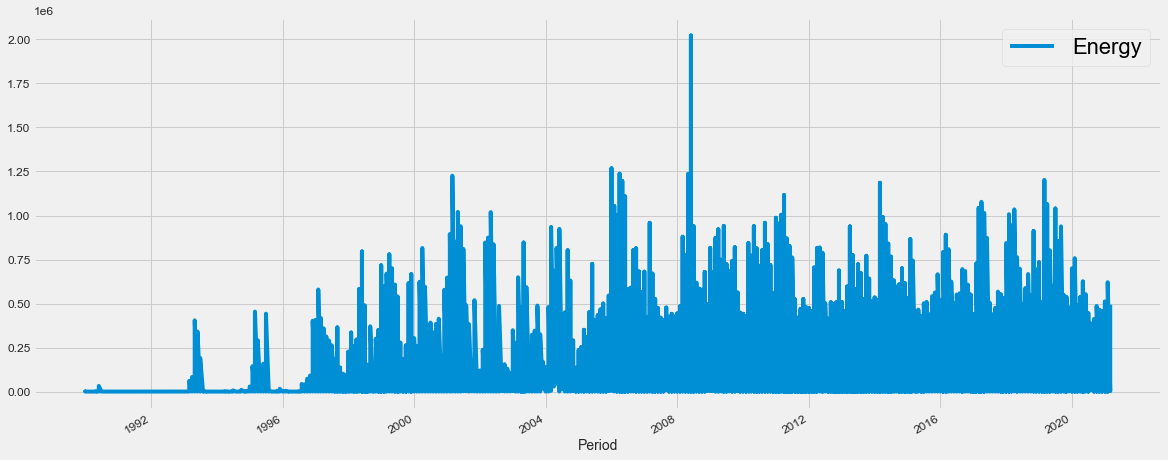

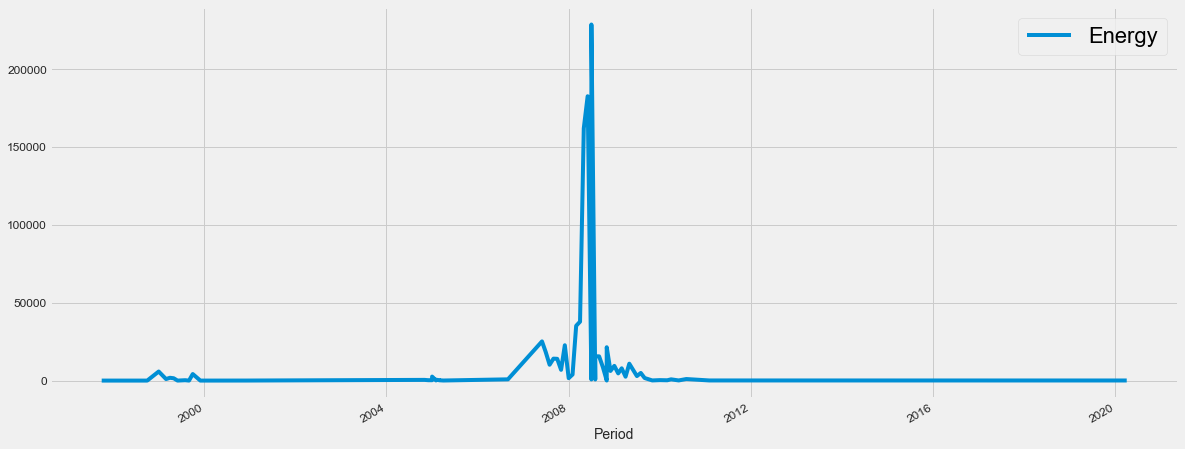

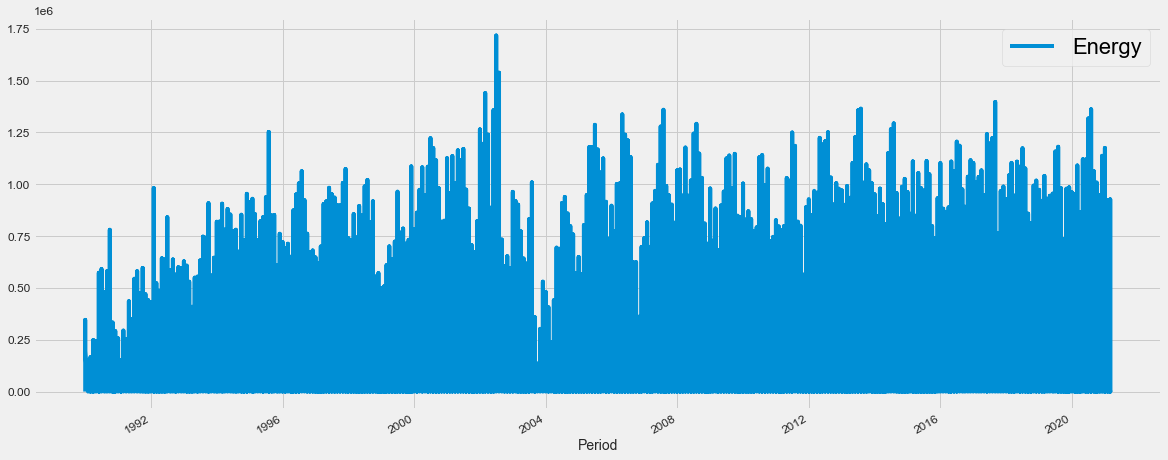

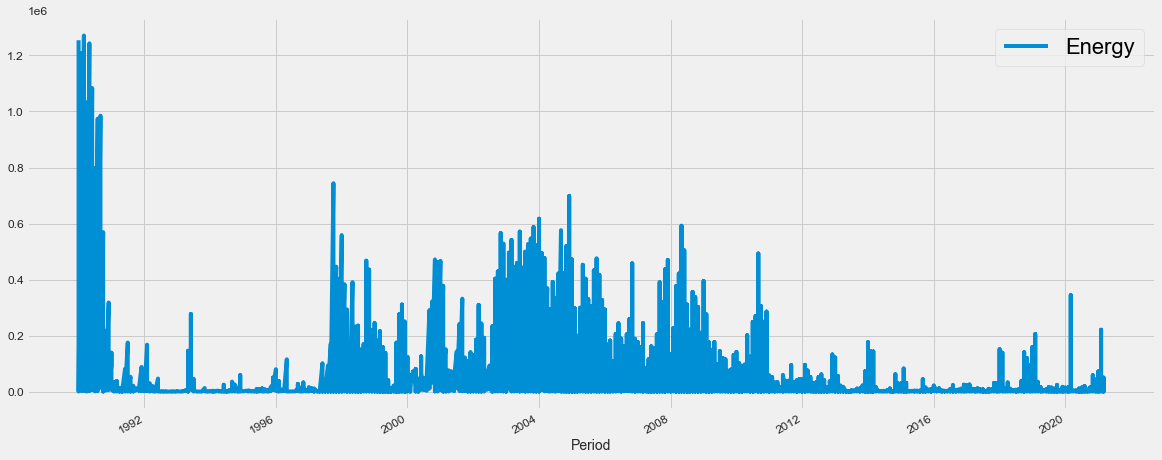

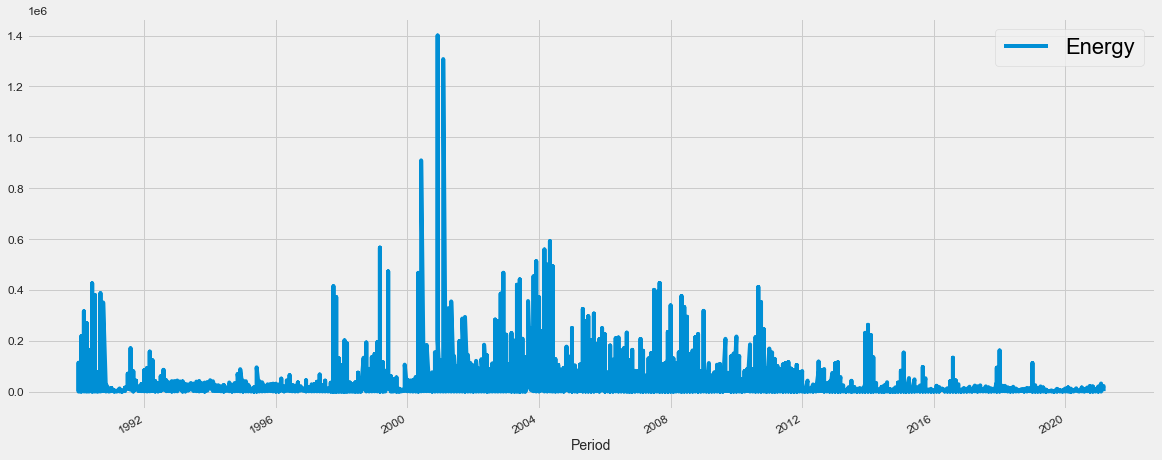

In [700]:
west_s.plot('Period', 'Energy')
south_s.plot('Period', 'Energy')
canada_s.plot('Period', 'Energy')
middle_s.plot('Period', 'Energy')
east_s.plot('Period', 'Energy')
plt.show()

In [701]:
canada_net.head()

,Period,EnergyS,Total_ValueS,PriceS,EnergyD,Total_ValueD,PriceD,Net
0,1997-02-28,2767060.471,9.093267e+07,626.330000,653599.00,13130239.87,316.939995,2113461.471
1,1997-03-31,3100076.948,9.540401e+07,638.880000,479291.90,10259813.74,348.859998,2620785.048
2,1997-04-30,3466407.860,1.001265e+08,647.580000,434195.24,9055953.90,218.430002,3032212.620
3,1997-05-31,2871591.900,8.833757e+07,679.989997,436407.76,9649268.92,243.650003,2435184.140
4,1997-06-30,3607702.042,1.154696e+08,834.889989,451981.10,11113504.12,341.960004,3155720.942


In [702]:
canada_net = canada_net.rename(columns = {'Energy' :'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS','Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})
canada_net.head()

,Period,EnergyS,Total_ValueS,PriceS,EnergyD,Total_ValueD,PriceD,Net
0,1997-02-28,2767060.471,9.093267e+07,626.330000,653599.00,13130239.87,316.939995,2113461.471
1,1997-03-31,3100076.948,9.540401e+07,638.880000,479291.90,10259813.74,348.859998,2620785.048
2,1997-04-30,3466407.860,1.001265e+08,647.580000,434195.24,9055953.90,218.430002,3032212.620
3,1997-05-31,2871591.900,8.833757e+07,679.989997,436407.76,9649268.92,243.650003,2435184.140
4,1997-06-30,3607702.042,1.154696e+08,834.889989,451981.10,11113504.12,341.960004,3155720.942


# Linear regression

In [703]:
# Subsetting our data into our dependent and independent variables.
X = canada_net[['EnergyS','Total_ValueS','PriceS','EnergyD','Total_ValueD','PriceD']]
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [704]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(232, 6) (232, 1)
(58, 6) (58, 1)


In [705]:
rModel = linear_model.LinearRegression(normalize=True)

In [706]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [707]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

1.0


In [708]:
# Use the model to make predictions about our test data
y_predict = rModel.predict(X_test)

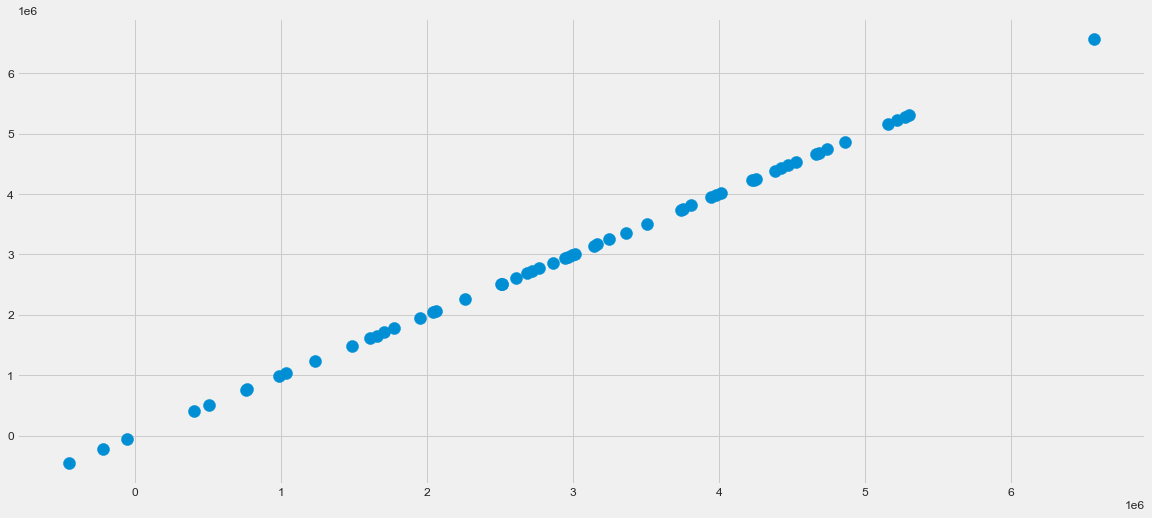

In [709]:
plt.scatter(y_test, y_predict);

In [710]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', rModel.coef_)
print("Mean squared error: %.2f" % np.mean((rModel.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % rModel.score(X_test, y_test))

R2 score : 1.00
Coefficients: 
 [[ 1.00000000e+00  1.25534956e-18 -5.06636478e-13 -1.00000000e+00
  -7.11948675e-18 -2.10077702e-13]]
Mean squared error: 0.00
Variance score: 1.00


In [711]:
X = canada_net[['PriceD','PriceD']]
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [712]:
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)
print(rModel.score(X_train, y_train))

0.048840737166934045


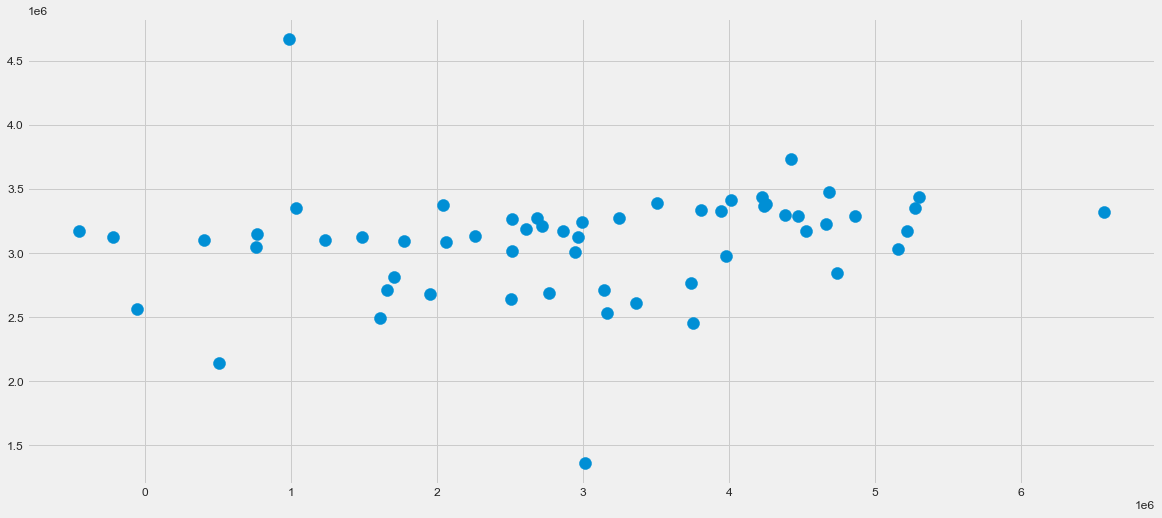

In [713]:
y_predict = rModel.predict(X_test)
plt.scatter(y_test, y_predict);

In [714]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', rModel.coef_)
print("Mean squared error: %.2f" % np.mean((rModel.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % rModel.score(X_test, y_test))

R2 score : 0.02
Coefficients: 
 [[-300.15360919 -300.15360919]]
Mean squared error: 2407176209718.62
Variance score: 0.02


In [715]:
X = canada_net[['EnergyS']]
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [716]:
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)
print(rModel.score(X_train, y_train))

0.9144757538468229


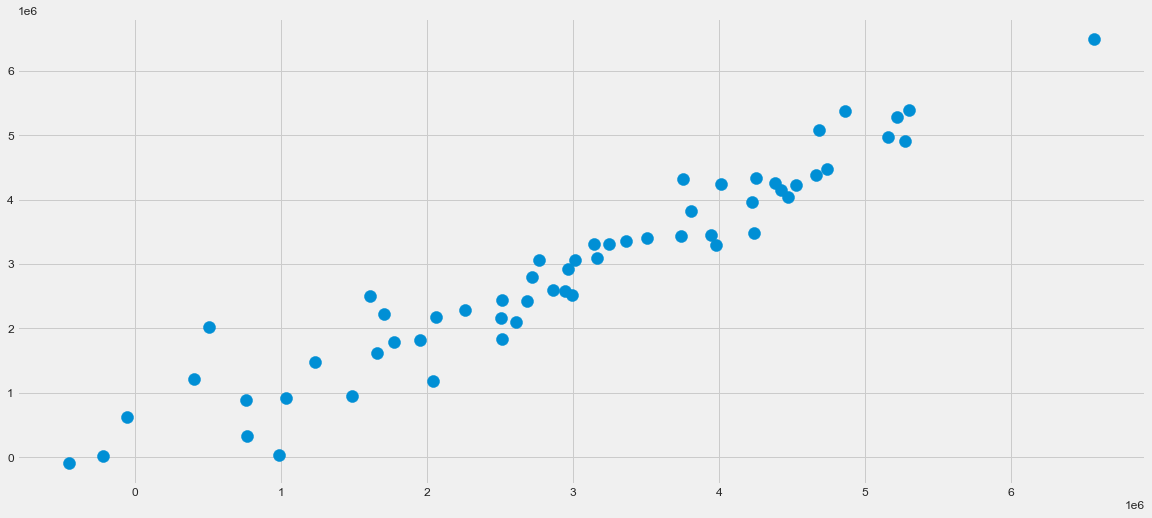

In [717]:
y_predict = rModel.predict(X_test)
plt.scatter(y_test, y_predict);

In [718]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', rModel.coef_)
print("Mean squared error: %.2f" % np.mean((rModel.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % rModel.score(X_test, y_test))

R2 score : 0.92
Coefficients: 
 [[1.19973015]]
Mean squared error: 196112185909.15
Variance score: 0.92


# Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [719]:
# Subsetting our data into our dependent and independent variables.
X = canada_net[['EnergyS','Total_ValueS','PriceS','EnergyD','Total_ValueD','PriceD']]
X = sm.add_constant(X)
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [720]:
rModel = sm.OLS(y_train, X_train)

In [721]:
rModel = rModel.fit()

In [722]:
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.025e+29
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:22:52   Log-Likelihood:                 3766.0
No. Observations:                 232   AIC:                            -7518.
Df Residuals:                     225   BIC:                            -7494.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.05e-08   8.71e-09      3.502      0.001    1.33e-08    4.77e-08
EnergyS          1.0000   1.97e-15   5.09e+14      0.000       1.000       1.000
Total_ValueS -2.411e-16   3.86e-17     -6.243      0.000   -3.17e-16   -1.65e-16
PriceS       -1.563e-12   4.83e-12     -0.324      0.747   -1.11e-11    7.96e-12
EnergyD         -1.0000   4.43e-15  -2.26e+14      0.000      -1.000      -1.000
Total_ValueD  6.072e-17   7.29e-17      0.833      0.406   -8.29e-17    2.04e-16
PriceD       -2.558e-13   3.21e-12     -0.080      0.937   -6.58e-12    6.07e-12
==============================================================================
Omnibus:                      139.772   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              822.685
Skew:                           2.438   Prob(JB):                    2.27e-179
Kurtosis:                      10.832   Cond. No.                     1.48e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [723]:
y_predict = rModel.predict(X_test)

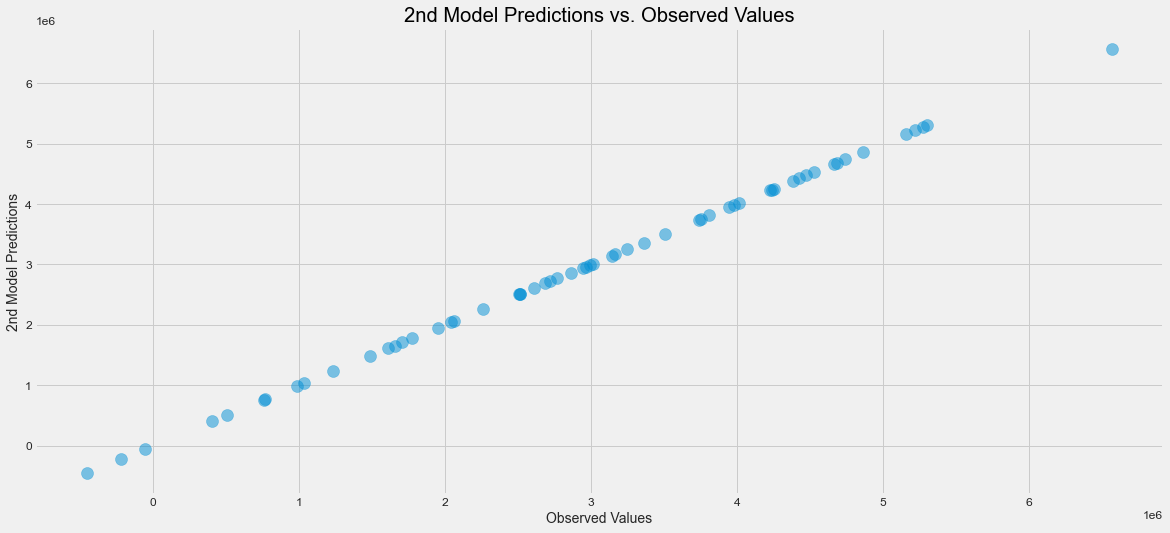

In [724]:

plt.scatter(y_test, y_predict, alpha=0.5)


plt.plot([x for x in range(6,15)],[x for x in range(6,15)], color='red')

plt.title('2nd Model Predictions vs. Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('2nd Model Predictions');

In [725]:
y_predictions = rModel.predict(X_test)

# Put the predictions & actual values into a dataframe
pred = pd.DataFrame(y_test)

pred['predictions'] = y_predictions

rsme(pred['predictions'], pred['Net'])

2.4986884416291822e-08

In [726]:
pred.head()

,Net,predictions
84,-2.188575e+05,-2.188575e+05
258,5.158166e+06,5.158166e+06
45,2.509160e+06,2.509160e+06
175,2.947073e+06,2.947073e+06
143,1.613463e+06,1.613463e+06


In [727]:
X = canada_net[['PriceS','PriceD']]
X = sm.add_constant(X)
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [728]:
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     6.013
Date:                Thu, 23 Sep 2021   Prob (F-statistic):            0.00285
Time:                        15:22:53   Log-Likelihood:                -3635.4
No. Observations:                 232   AIC:                             7277.
Df Residuals:                     229   BIC:                             7287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.669e+06   2.44e+05     15.038      0.000    3.19e+06    4.15e+06
PriceS       -83.2418    165.037     -0.504      0.614    -408.427     241.944
PriceD      -537.1085    215.203     -2.496      0.013    -961.141    -113.076
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.140
Skew:                          -0.167   Prob(JB):                        0.565
Kurtosis:                       2.923   Cond. No.                     4.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [729]:
y_predict = rModel.predict(X_test)

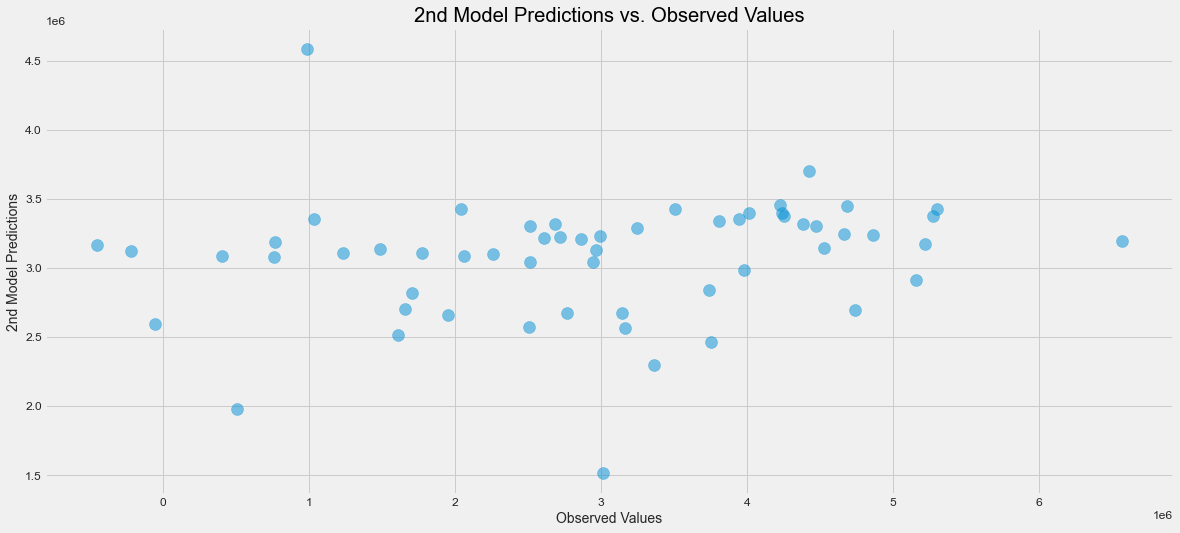

In [730]:

plt.scatter(y_test, y_predict, alpha=0.5)


plt.title('2nd Model Predictions vs. Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('2nd Model Predictions');

In [731]:
X = canada_net[['EnergyS']]
X = sm.add_constant(X)
y = canada_net[['Net']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [732]:
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2459.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          8.51e-125
Time:                        15:22:53   Log-Likelihood:                -3356.1
No. Observations:                 232   AIC:                             6716.
Df Residuals:                     230   BIC:                             6723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.084e+06   1.07e+05    -19.401      0.000    -2.3e+06   -1.87e+06
EnergyS        1.1997      0.024     49.591      0.000       1.152       1.247
==============================================================================
Omnibus:                       62.196   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.929
Skew:                          -1.057   Prob(JB):                     8.71e-50
Kurtosis:                       7.348   Cond. No.                     1.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [733]:
y_predict = rModel.predict(X_test)

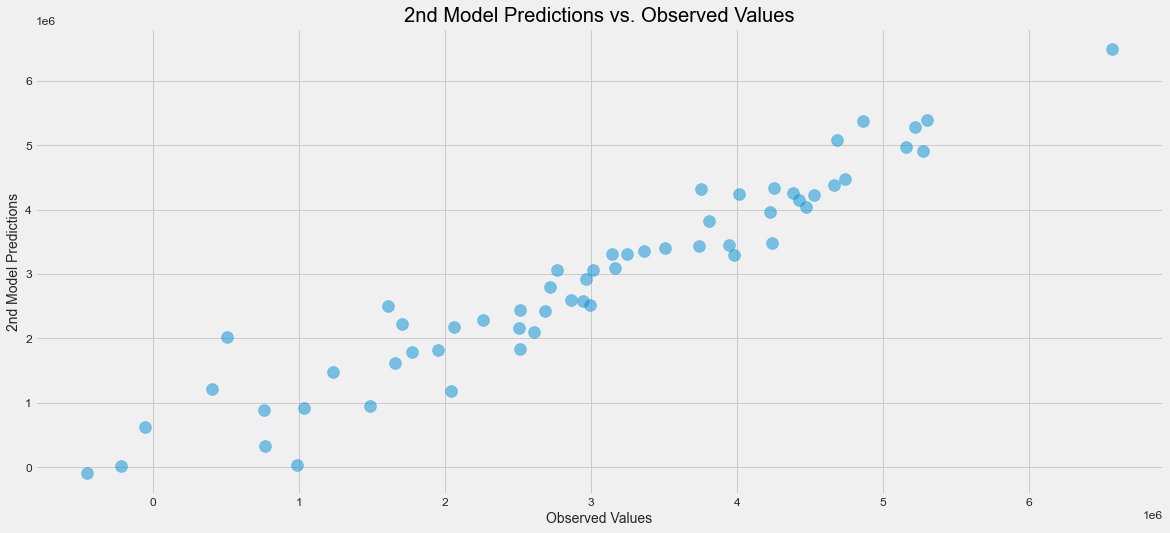

In [734]:
plt.scatter(y_test, y_predict, alpha=0.5)

plt.title('2nd Model Predictions vs. Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('2nd Model Predictions');

In [735]:

# Define a function to check the RMSE. Remember the def keyword needed to make functions? 

def rsme(pred, test):
    return np.sqrt(((pred-test)**2).mean())

In [736]:
y_predictions = rModel.predict(X_test)

# Put the predictions & actual values into a dataframe
pred = pd.DataFrame(y_test)

pred['predictions'] = y_predictions

rsme(pred['predictions'], pred['Net'])

442845.55536794796

# LASSO MODELS WITH ALPHA = 1

In [737]:
from sklearn import datasets
from sklearn.linear_model import Lasso
bh = canada_net
X = bh[['EnergyS','Total_ValueS','PriceS','EnergyD','Total_ValueD','PriceD']]
y = bh['Net']
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#

y_predict = lasso.predict(X_test)
#
lasso.score(X_test, y_test), lasso.score(X_train, y_train)


(0.999999999999918, 0.9999999999999496)

In [738]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', lasso.coef_)
print("Mean squared error: %.2f" % np.mean((lasso.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % lasso.score(X_test, y_test))

R2 score : 1.00
Coefficients: 
 [ 1.00000038e+00 -7.86407768e-09  1.02252772e-04 -1.00000049e+00
  1.25724668e-08  1.05659461e-04]
Mean squared error: 0.19
Variance score: 1.00


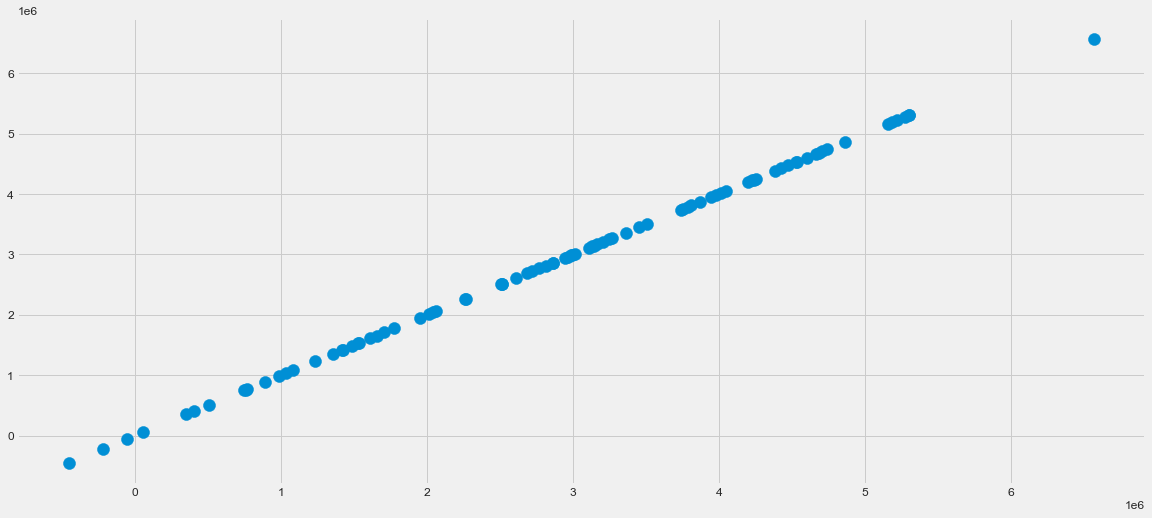

In [739]:
plt.scatter(y_test, y_predict);

In [740]:
from sklearn import datasets
from sklearn.linear_model import Lasso
bh = canada_net
X = bh[['PriceS','PriceD']]
y = bh['Net']
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#

y_predict = lasso.predict(X_test)
#
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(-0.014741157772587998, 0.05605775671273816)

In [741]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', lasso.coef_)
print("Mean squared error: %.2f" % np.mean((lasso.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % lasso.score(X_test, y_test))

R2 score : -0.01
Coefficients: 
 [-137.28454926 -513.77059499]
Mean squared error: 2401484156464.20
Variance score: -0.01


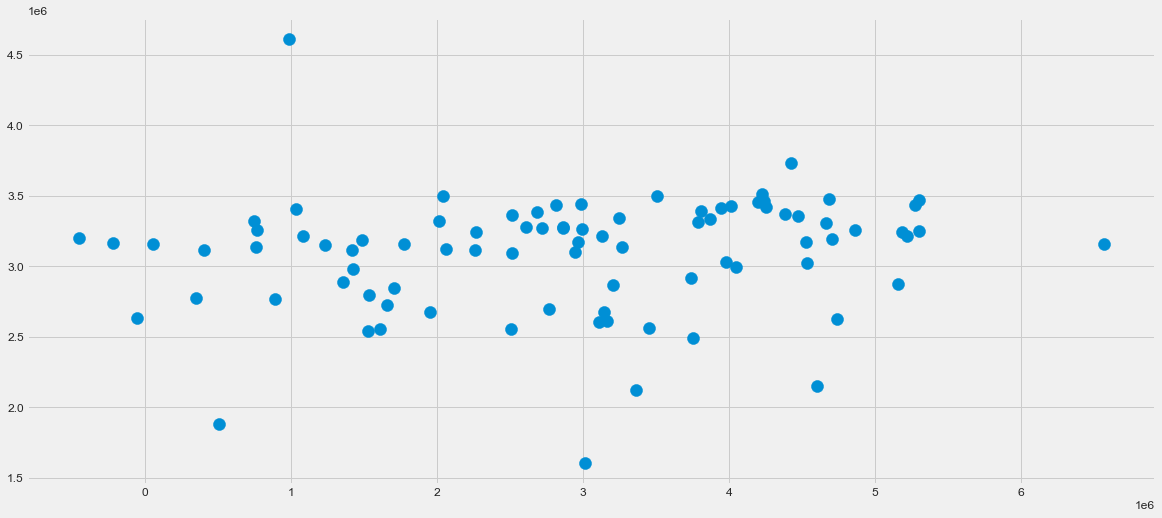

In [742]:
plt.scatter(y_test, y_predict);

In [743]:
from sklearn import datasets
from sklearn.linear_model import Lasso
bh = canada_net
X = bh[['EnergyS']]
y = bh['Net']
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#

y_predict = lasso.predict(X_test)
#
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.9119173313762459, 0.9168088736524725)

In [744]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', lasso.coef_)
print("Mean squared error: %.2f" % np.mean((lasso.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % lasso.score(X_test, y_test))

R2 score : 0.91
Coefficients: 
 [1.20252426]
Mean squared error: 208456246737.20
Variance score: 0.91


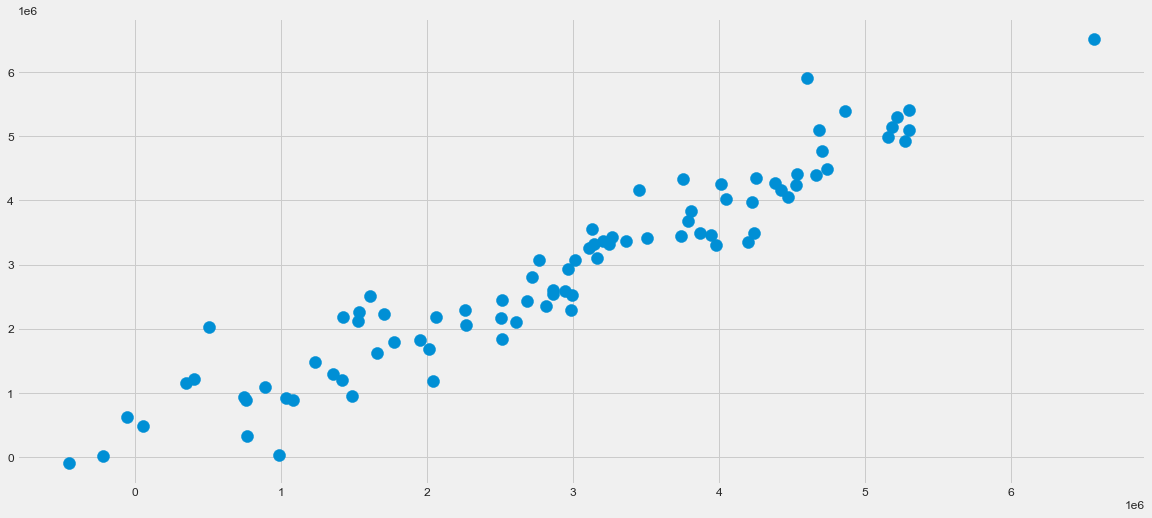

In [745]:
plt.scatter(y_test, y_predict);

# LASSO REGRESSION with CrossVAlidation

In [746]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
#

#
bh = canada_net
X = bh[['PriceS','PriceD']]
y = bh['Net']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
#
lasso_cv.score(X_test, y_test), lasso_cv.score(X_train, y_train)

(0.021134710246754285, 0.03970264084578856)

In [747]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
#

#
bh = canada_net
X = bh[['EnergyS']]
y = bh['Net']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
#
lasso_cv.score(X_test, y_test), lasso_cv.score(X_train, y_train)

(0.9119810041815308, 0.916794039841381)

In [748]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
#

#
bh = canada_net
X = bh[['EnergyS','Total_ValueS','PriceS','EnergyD','Total_ValueD','PriceD']]
y = bh['Net']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X, y)
#
# Create the model score
#
lasso_cv.score(X_test, y_test), lasso_cv.score(X_train, y_train)

(0.9914942343309574, 0.9903038729027732)